<a href="https://colab.research.google.com/github/iTosy/Itpp_BPSK_for_SNR_4db_low_BLER/blob/main/testwithmodulatedreceived.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install autoconf
!sudo apt-get install libtool
!sudo apt-get install liblapack-dev libblas-dev libfftw3-dev
!rm -rf itpp
!git clone https://github.com/iamviji/itpp.git # original one had compilation issue, did minor signle line change after forking
!ls;cd itpp;ls;mkdir -p build1 build2; cd build1 ; cmake cmake ..;make ;make install
!rm -rf py-itpp
!git clone https://github.com/vidits-kth/py-itpp.git
!pip3 install pybind11
!cd py-itpp;./install_prerequisites_python3.sh;make install;pip3 install -e .
!cd py-itpp; ls ; pip3 install -e .
!cat py-itpp/setup.py
#following 3 lines are added to resolve the issue
import sys
sys.path.append('./py-itpp/lib')
!cp -rf py-itpp/lib/itpp py-itpp/lib/pyitpp # import itpp is not working, after this hack i started to work


Reading package lists... Done
Building dependency tree       
Reading state information... Done
autoconf is already the newest version (2.69-11.1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtool is already the newest version (2.4.6-14).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libblas-dev is already the newest version (3.9.0-1build1).
libfftw3-dev is already the newest version (3.3.8-2ubuntu1).
liblapack-dev is already the newest version (3.9.0-1build1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Cloning into 'itpp'...
remote: Enumerating objects: 14431, done.
remote: Total 14431 (delta 0), reused 0 (delta 0), pack-reused 14431
Receiving objects: 100% (14431/14431), 4.88 MiB | 16.72 MiB/s, done.
Resolving deltas: 100% (12154/1215

In [3]:
import tensorflow as tf
import numpy as np


In [4]:
import pyitpp as itpp
from matplotlib import pyplot as plt
import cmath

[-1+0i -1+0i -1+0i -1+0i 1+0i 1+0i 1+0i -1+0i 1+0i -1+0i -1+0i -1+0i 1+0i 1+0i -1+0i -1+0i 1+0i 1+0i 1+0i -1+0i 1+0i 1+0i -1+0i -1+0i -1+0i -1+0i -1+0i -1+0i 1+0i -1+0i 1+0i -1+0i -1+0i 1+0i 1+0i 1+0i -1+0i 1+0i 1+0i 1+0i -1+0i 1+0i -1+0i -1+0i 1+0i 1+0i -1+0i 1+0i 1+0i -1+0i 1+0i 1+0i -1+0i 1+0i -1+0i 1+0i -1+0i -1+0i 1+0i -1+0i -1+0i -1+0i 1+0i 1+0i -1+0i -1+0i 1+0i 1+0i 1+0i -1+0i -1+0i 1+0i -1+0i -1+0i -1+0i 1+0i -1+0i -1+0i -1+0i 1+0i 1+0i -1+0i 1+0i 1+0i 1+0i 1+0i 1+0i -1+0i 1+0i -1+0i 1+0i 1+0i -1+0i -1+0i -1+0i -1+0i -1+0i -1+0i -1+0i 1+0i 1+0i 1+0i -1+0i -1+0i 1+0i -1+0i -1+0i -1+0i -1+0i 1+0i -1+0i -1+0i -1+0i -1+0i -1+0i -1+0i 1+0i -1+0i 1+0i -1+0i -1+0i 1+0i 1+0i -1+0i -1+0i -1+0i 1+0i 1+0i -1+0i -1+0i 1+0i -1+0i -1+0i -1+0i 1+0i 1+0i -1+0i 1+0i 1+0i 1+0i -1+0i -1+0i -1+0i 1+0i 1+0i 1+0i 1+0i 1+0i -1+0i 1+0i -1+0i -1+0i -1+0i -1+0i -1+0i 1+0i -1+0i 1+0i 1+0i 1+0i -1+0i 1+0i -1+0i 1+0i 1+0i -1+0i -1+0i -1+0i -1+0i -1+0i 1+0i -1+0i 1+0i 1+0i -1+0i -1+0i -1+0i -1+0i -1+0i 1+0i

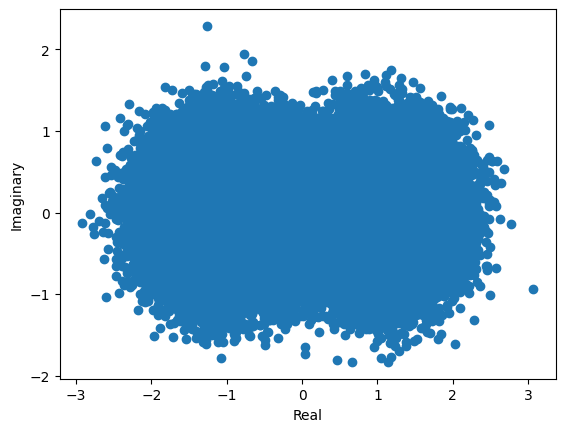

0.047733333333333336


In [6]:
snr_db = 4
block_size = 4
'''Generate random bits'''
nrof_bits = 3 * 10000 * block_size
source_bits = itpp.randb(nrof_bits)
rate = 1.0
    
'''Modulate the bits'''

modulator_ = itpp.comm.BPSK_c()
tx_signal = modulator_.modulate_bits(source_bits)
print(tx_signal)

'''
modulator_ = itpp.comm.modulator_2d()
constellation = itpp.cvec('-1-0i, 1+0i')
symbols = itpp.ivec('0, 1')
modulator_.set(constellation, symbols)
tx_signal = modulator_.modulate_bits(source_bits) 
print(type(tx_signal[0]))
'''

  
'''Add the effect of channel to the signal'''

noise_variance = 10 ** ((0-snr_db) * 0.1)
channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)
rx_signal = channel(tx_signal)
print(rx_signal[0])
x=[]
y=[]
for i in range(rx_signal.length()):
  x.append(rx_signal[i].real)
  y.append(rx_signal[i].imag)


plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()


'''
noise_variance = 1.0 / (rate * pow(10, 0.1 * snr_db))
noise = itpp.randn_c(tx_signal.length())
noise *= itpp.math.sqrt(noise_variance)
rx_signal = tx_signal + noise
'''


    
'''Demodulate the signal'''
demodulated_bits = modulator_.demodulate_bits(rx_signal)

'''Calculate the block error ratio'''
blerc = itpp.comm.BLERC(block_size)
blerc.count(source_bits, demodulated_bits)
print(blerc.get_errorrate())